In [5]:
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt

In [6]:
def display_image(img):
    plt.imshow(sitk.GetArrayFromImage(img), cmap='gray')
    plt.axis("off")

def overlay_fixed_moving(fixed, moving):
    img1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    img2 = sitk.Cast(sitk.RescaleIntensity(moving), sitk.sitkUInt8)
    cimg = sitk.Compose(img1, img2, sitk.Cast(img1/2. + img2/2., sitk.sitkUInt8))
    plt.imshow(sitk.GetArrayFromImage(cimg))
    plt.axis("off")

# Rigid Registration

A rigid transform can register objects that are related by rotation and translation. For example, if you are registering images of a patient’s bones, you can often assume that a rigid transform is sufficient to align these structures. In fact, it is often advantageus to chose a simple transform if problems that allows it, as this constrains the solution space and ensures no spurious non-rigid local minima affect your results. Think of it as a way of embedding expert knowledge in the registration procedure.

---

#### Tip

Rigid registration is one of the simplest of methods in the catagory of linear transformation models and is often used as initialization for affine- and non-rigid transforms.

---

The rigid transform is selected using `(Transform "EulerTransform")`. 

In [47]:
dataPath = os.path.join(os.sep, "Users", "tannersorensen", "SimpleElastix-fork", \
                        "SimpleElastix-build", "SimpleITK-build", "ExternalData", \
                        "Testing", "Data", "Input")

fixedFilename = "BrainProtonDensitySliceShifted13x17y.png"
fixedImage = sitk.ReadImage(os.path.join(dataPath, fixedFilename), sitk.sitkUInt8)

movingFilename = "BrainProtonDensitySliceR10X13Y17.png"
movingImage = sitk.ReadImage(os.path.join(dataPath, movingFilename), sitk.sitkUInt8)

Consider the fixed image (left) and translated and rotated moving image (center) in the figure below. The fixed (red) and moving (green) images are overlaid in the right panel.

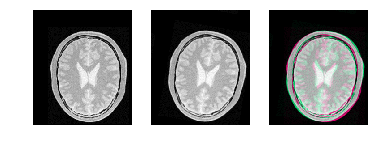

In [48]:
# fixed image
plt.subplot(1,3,1)
display_image(fixedImage)

# moving image
plt.subplot(1,3,2)
display_image(movingImage)

# fixed image (red) and moving image (green),
# with overlap in white
plt.subplot(1,3,3)
overlay_fixed_moving(fixedImage, movingImage)

The image on right has been rotated 10 degrees and translated 13 pixels in the x-direction and 17 pixels in the y-direction. Using the `EulerTransform` we may correct for this misalignment.

In [49]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
elastixImageFilter.Execute()
resultImage = elastixImageFilter.GetResultImage()
sitk.WriteImage(sitk.Cast(resultImage, sitk.sitkUInt8), "rigid_result_"+movingFilename)

It is clear from the result mean image after registration (right) in the figure below that registration was successful.

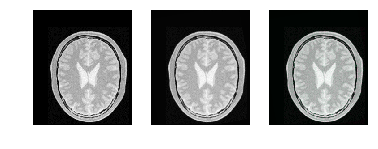

In [50]:
# fixed image
plt.subplot(1,3,1)
display_image(fixedImage)

# registered moving image (result)
plt.subplot(1,3,2)
display_image(resultImage)

# fixed image (red) and registered 
# moving image (green), with overlap in white
# note that the images completely overlap
# (i.e., no red or green)
plt.subplot(1,3,3)
overlay_fixed_moving(fixedImage, resultImage)

In the next example we will introduce scaling and shearing into the registration.